In [1]:
%matplotlib inline
from preamble import *

# Working with Text Data

### Types of data represented as strings
#### Example application: Sentiment analysis of movie reviews

In [2]:
!tree -L 2 data/aclImdb

data/aclImdb
├── test
│   ├── neg
│   └── pos
└── train
    ├── neg
    └── pos

6 directories, 0 files


In [3]:
from sklearn.datasets import load_files

reviews_train = load_files("data/aclImdb/train/")
# load_files returns a bunch, containing training texts and training labels
text_train, y_train = reviews_train.data, reviews_train.target
print("type of text_train: ", type(text_train))
print("length of text_train: ", len(text_train))
print("text_train[1]:")
# print review number 1
print(text_train[1])

type of text_train:  <class 'list'>
length of text_train:  25000
text_train[1]:
b'Words can\'t describe how bad this movie is. I can\'t explain it by writing only. You have too see it for yourself to get at grip of how horrible a movie really can be. Not that I recommend you to do that. There are so many clich\xc3\xa9s, mistakes (and all other negative things you can imagine) here that will just make you cry. To start with the technical first, there are a LOT of mistakes regarding the airplane. I won\'t list them here, but just mention the coloring of the plane. They didn\'t even manage to show an airliner in the colors of a fictional airline, but instead used a 747 painted in the original Boeing livery. Very bad. The plot is stupid and has been done many times before, only much, much better. There are so many ridiculous moments here that i lost count of it really early. Also, I was on the bad guys\' side all the time in the movie, because the good guys were so stupid. "Executive Decis

In [4]:
text_train = [doc.replace(b"<br />", b" ") for doc in text_train]

In [5]:
print(np.bincount(y_train))

[12500 12500]


In [6]:
reviews_test = load_files("data/aclImdb/test/")
text_test, y_test = reviews_test.data, reviews_test.target
print("Number of documents in test data: %d" % len(text_test))
print(np.bincount(y_test))
text_test = [doc.replace(b"<br />", b" ") for doc in text_test]

Number of documents in test data: 25000
[12500 12500]


### Representing text data as Bag of Words

![bag_of_words](images/bag_of_words.png)

#### Applying bag-of-words to a toy dataset

In [7]:
bards_words =["The fool doth think he is wise,",
              "but the wise man knows himself to be a fool"]

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
vect.fit(bards_words)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [9]:
print(len(vect.vocabulary_))
print("vocabulary content:")
vect.vocabulary_

13
vocabulary content:


{'be': 0,
 'but': 1,
 'doth': 2,
 'fool': 3,
 'he': 4,
 'himself': 5,
 'is': 6,
 'knows': 7,
 'man': 8,
 'the': 9,
 'think': 10,
 'to': 11,
 'wise': 12}

In [10]:
bag_of_words = vect.transform(bards_words)
bag_of_words

<2x13 sparse matrix of type '<class 'numpy.int64'>'
	with 16 stored elements in Compressed Sparse Row format>

In [11]:
print(bag_of_words.toarray())

[[0 0 1 1 1 0 1 0 0 1 1 0 1]
 [1 1 0 1 0 1 0 1 1 1 0 1 1]]


### Bag-of-word for movie reviews

In [12]:
vect = CountVectorizer().fit(text_train)
X_train = vect.transform(text_train)
print(repr(X_train))

<25000x74849 sparse matrix of type '<class 'numpy.int64'>'
	with 3431196 stored elements in Compressed Sparse Row format>


In [13]:
feature_names = vect.get_feature_names()
print(len(feature_names))
# print first fifty features
print(feature_names[:20])
# print feature 20010 to 20030
print(feature_names[20010:20030])
# get every 2000th word to get an overview
print(feature_names[::2000])

74849
['00', '000', '0000000000001', '00001', '00015', '000s', '001', '003830', '006', '007', '0079', '0080', '0083', '0093638', '00am', '00pm', '00s', '01', '01pm', '02']
['dratted', 'draub', 'draught', 'draughts', 'draughtswoman', 'draw', 'drawback', 'drawbacks', 'drawer', 'drawers', 'drawing', 'drawings', 'drawl', 'drawled', 'drawling', 'drawn', 'draws', 'draza', 'dre', 'drea']
['00', 'aesir', 'aquarian', 'barking', 'blustering', 'bête', 'chicanery', 'condensing', 'cunning', 'detox', 'draper', 'enshrined', 'favorit', 'freezer', 'goldman', 'hasan', 'huitieme', 'intelligible', 'kantrowitz', 'lawful', 'maars', 'megalunged', 'mostey', 'norrland', 'padilla', 'pincher', 'promisingly', 'receptionist', 'rivals', 'schnaas', 'shunning', 'sparse', 'subset', 'temptations', 'treatises', 'unproven', 'walkman', 'xylophonist']


In [14]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

scores = cross_val_score(LogisticRegression(), X_train, y_train, cv=5)
print("%.2f" % np.mean(scores))

0.88


In [15]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best cross-validation score: %.2f" % grid.best_score_)
print("Best parameters: ", grid.best_params_)

Best cross-validation score: 0.89
Best parameters:  {'C': 0.1}


In [16]:
X_test = vect.transform(text_test)
print("%.2f" % grid.score(X_test, y_test))

0.88


In [17]:
vect = CountVectorizer(min_df=5).fit(text_train)
X_train = vect.transform(text_train)
print(repr(X_train))

<25000x27271 sparse matrix of type '<class 'numpy.int64'>'
	with 3354014 stored elements in Compressed Sparse Row format>


In [18]:
feature_names = vect.get_feature_names()

# print first fifty features
print(feature_names[:50])
# print feature 20010 to 20020
print(feature_names[20010:20030])
#
print(feature_names[::700])

['00', '000', '007', '00s', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '100', '1000', '100th', '101', '102', '103', '104', '105', '107', '108', '10s', '10th', '11', '110', '112', '116', '117', '11th', '12', '120', '12th', '13', '135', '13th', '14', '140', '14th', '15', '150', '15th', '16', '160', '1600', '16mm', '16s', '16th']
['repentance', 'repercussions', 'repertoire', 'repetition', 'repetitions', 'repetitious', 'repetitive', 'rephrase', 'replace', 'replaced', 'replacement', 'replaces', 'replacing', 'replay', 'replayable', 'replayed', 'replaying', 'replays', 'replete', 'replica']
['00', 'affections', 'appropriately', 'barbra', 'blurbs', 'butchered', 'cheese', 'commitment', 'courts', 'deconstructed', 'disgraceful', 'dvds', 'eschews', 'fell', 'freezer', 'goriest', 'hauser', 'hungary', 'insinuate', 'juggle', 'leering', 'maelstrom', 'messiah', 'music', 'occasional', 'parking', 'pleasantville', 'pronunciation', 'recipient', 'reviews', 'sas', 'shea', 'sneers', 'steiger', 

In [19]:
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best cross-validation score: %.2f" % grid.best_score_)

Best cross-validation score: 0.89


### Stop-words

In [20]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
# print number of stop words
print(len(ENGLISH_STOP_WORDS))
# print some of the stop words
print(list(ENGLISH_STOP_WORDS)[::10])

318
['thereupon', 'once', 'afterwards', 'almost', 'what', 'often', 'via', 'serious', 'formerly', 'amount', 'show', 'forty', 'other', 'perhaps', 'former', 'third', 'three', 'where', 'would', 'you', 'if', 'etc', 'twelve', 'full', 'noone', 'couldnt', 'here', 'call', 'fill', 'whole', 'never', 'me']


In [21]:
# specifying "english" uses the build-in list. We could also augment it and pass our own.
vect = CountVectorizer(min_df=5, stop_words="english").fit(text_train)
X_train = vect.transform(text_train)
print(repr(X_train))

<25000x26966 sparse matrix of type '<class 'numpy.int64'>'
	with 2149958 stored elements in Compressed Sparse Row format>


In [22]:
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best cross-validation score: %.2f" % grid.best_score_)

Best cross-validation score: 0.88


## Rescaling the data with TFIDF
\begin{equation*}
\text{tfidf}(w, d) = \text{tf} \log\big(\frac{N + 1}{N_w + 1}\big) + 1
\end{equation*}

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(TfidfVectorizer(min_df=5, norm=None),
                     LogisticRegression())
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10]}

grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(text_train, y_train)
print("Best cross-validation score: %.2f" % grid.best_score_)

Best cross-validation score: 0.89


In [24]:
vectorizer = grid.best_estimator_.named_steps["tfidfvectorizer"]
# transform the training dataset:
X_train = vectorizer.transform(text_train)
# find maximum value for each of the features over dataset:
max_value = X_train.max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()
# get feature names
feature_names = np.array(vectorizer.get_feature_names())

print("features with lowest tfidf")
print(feature_names[sorted_by_tfidf[:20]])

print("features with highest tfidf")
print(feature_names[sorted_by_tfidf[-20:]])

features with lowest tfidf
['poignant' 'disagree' 'instantly' 'importantly' 'lacked' 'occurred'
 'currently' 'altogether' 'nearby' 'undoubtedly' 'directs' 'fond' 'stinker'
 'avoided' 'emphasis' 'commented' 'disappoint' 'realizing' 'downhill'
 'inane']
features with highest tfidf
['coop' 'homer' 'dillinger' 'hackenstein' 'gadget' 'taker' 'macarthur'
 'vargas' 'jesse' 'basket' 'dominick' 'the' 'victor' 'bridget' 'victoria'
 'khouri' 'zizek' 'rob' 'timon' 'titanic']


In [25]:
sorted_by_idf = np.argsort(vectorizer.idf_)
print("features with lowest idf")
print(feature_names[sorted_by_idf[:100]])

features with lowest idf
['the' 'and' 'of' 'to' 'this' 'is' 'it' 'in' 'that' 'but' 'for' 'with'
 'was' 'as' 'on' 'movie' 'not' 'have' 'one' 'be' 'film' 'are' 'you' 'all'
 'at' 'an' 'by' 'so' 'from' 'like' 'who' 'they' 'there' 'if' 'his' 'out'
 'just' 'about' 'he' 'or' 'has' 'what' 'some' 'good' 'can' 'more' 'when'
 'time' 'up' 'very' 'even' 'only' 'no' 'would' 'my' 'see' 'really' 'story'
 'which' 'well' 'had' 'me' 'than' 'much' 'their' 'get' 'were' 'other'
 'been' 'do' 'most' 'don' 'her' 'also' 'into' 'first' 'made' 'how' 'great'
 'because' 'will' 'people' 'make' 'way' 'could' 'we' 'bad' 'after' 'any'
 'too' 'then' 'them' 'she' 'watch' 'think' 'acting' 'movies' 'seen' 'its'
 'him']


### Investigating model coefficients

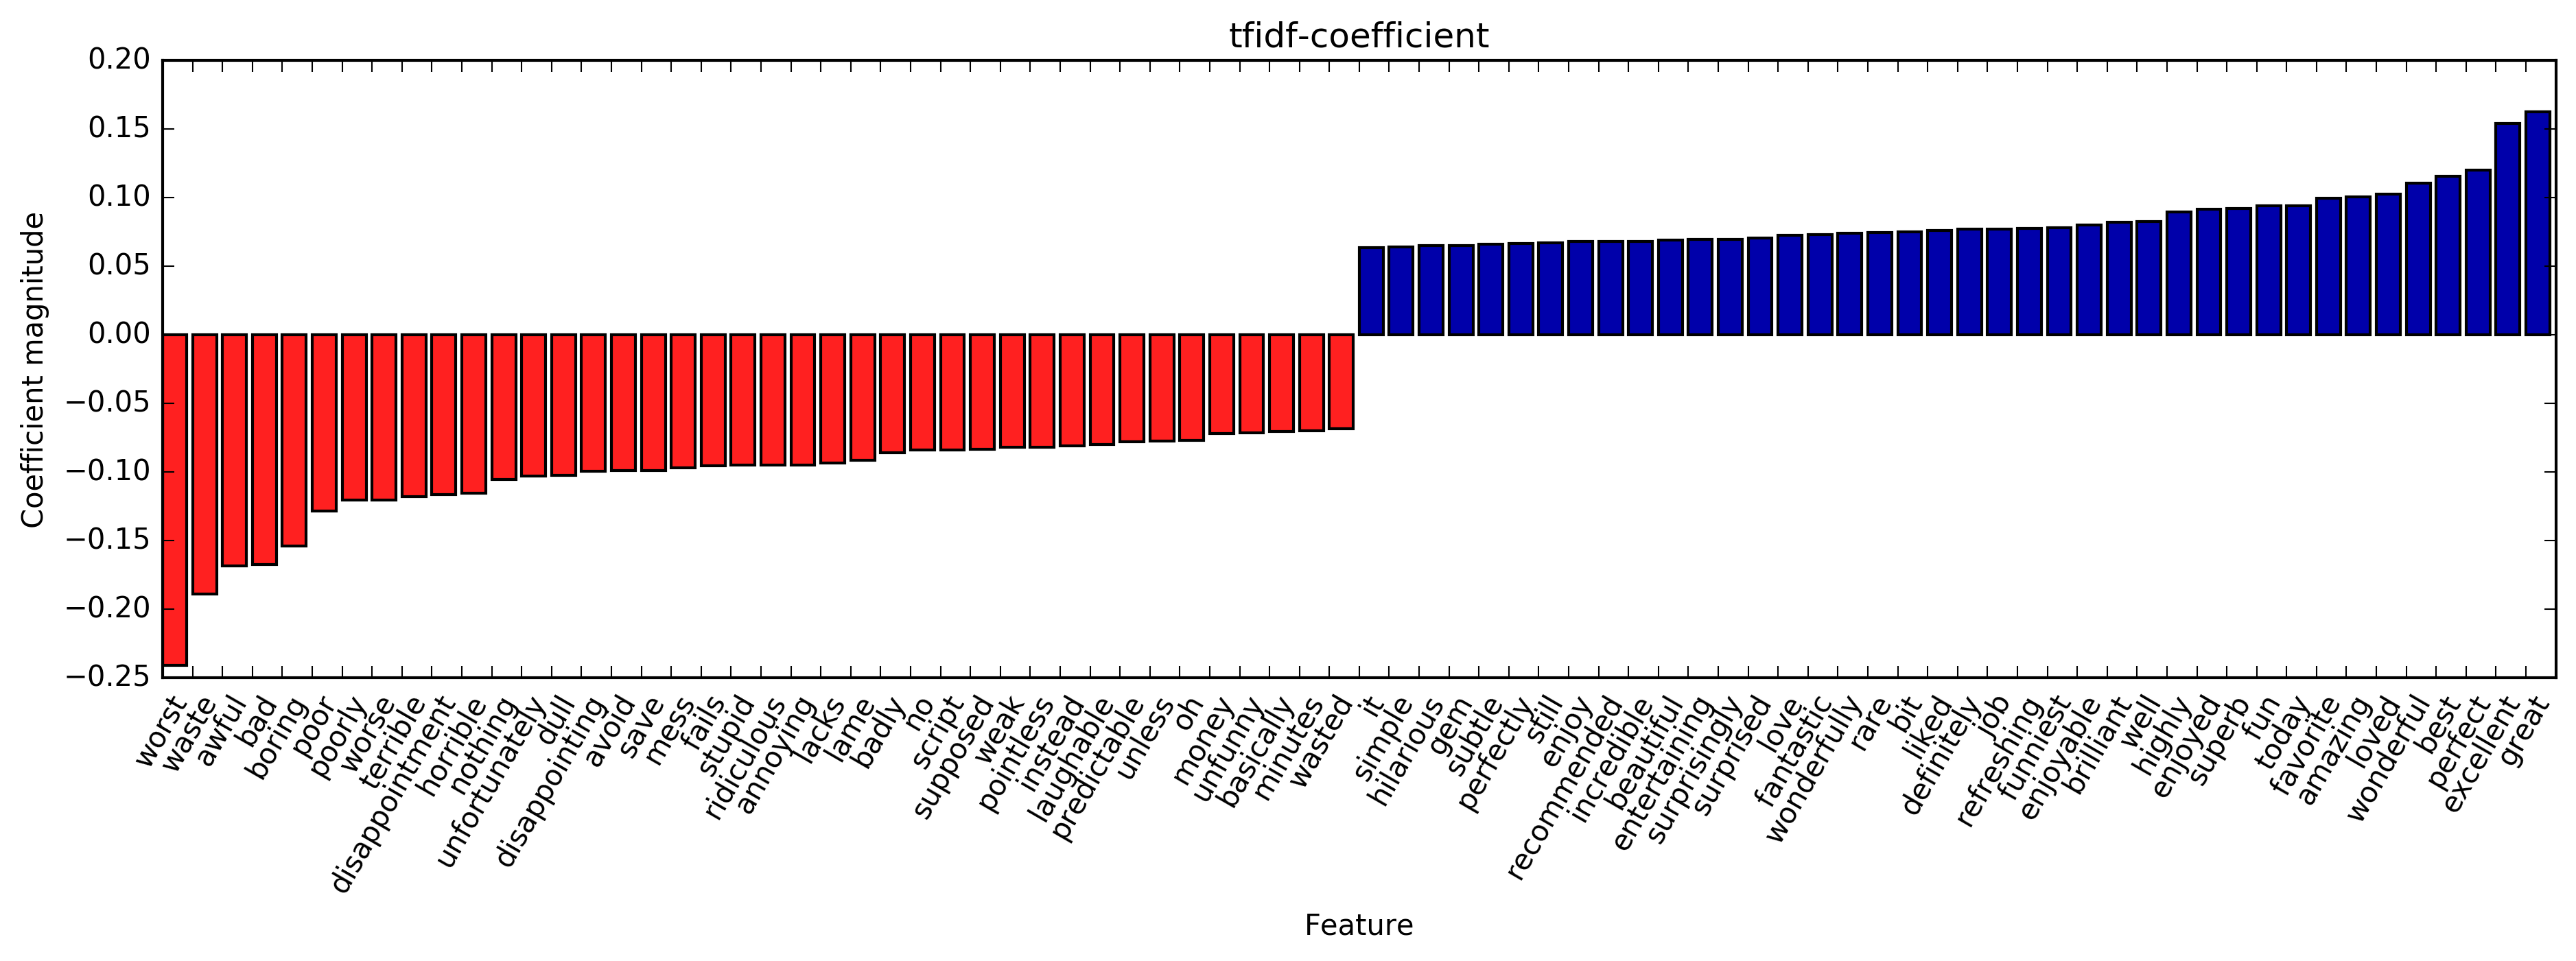

In [26]:
mglearn.tools.visualize_coefficients(
    grid.best_estimator_.named_steps["logisticregression"].coef_,
    feature_names, n_top_features=40)
plt.title("tfidf-coefficient")

### Bag of words with more than one word (n-grams)

In [27]:
print(bards_words)

['The fool doth think he is wise,', 'but the wise man knows himself to be a fool']


In [28]:
cv = CountVectorizer(ngram_range=(1, 1)).fit(bards_words)
print(len(cv.vocabulary_))
print(cv.get_feature_names())

13
['be', 'but', 'doth', 'fool', 'he', 'himself', 'is', 'knows', 'man', 'the', 'think', 'to', 'wise']


In [29]:
cv = CountVectorizer(ngram_range=(2, 2)).fit(bards_words)
print(len(cv.vocabulary_))
print(cv.get_feature_names())

14
['be fool', 'but the', 'doth think', 'fool doth', 'he is', 'himself to', 'is wise', 'knows himself', 'man knows', 'the fool', 'the wise', 'think he', 'to be', 'wise man']


In [30]:
cv.transform(bards_words).toarray()

array([[0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0],
       [1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1]])

In [31]:
cv = CountVectorizer(ngram_range=(1, 3)).fit(bards_words)
print(len(cv.vocabulary_))
print(cv.get_feature_names())

39
['be', 'be fool', 'but', 'but the', 'but the wise', 'doth', 'doth think', 'doth think he', 'fool', 'fool doth', 'fool doth think', 'he', 'he is', 'he is wise', 'himself', 'himself to', 'himself to be', 'is', 'is wise', 'knows', 'knows himself', 'knows himself to', 'man', 'man knows', 'man knows himself', 'the', 'the fool', 'the fool doth', 'the wise', 'the wise man', 'think', 'think he', 'think he is', 'to', 'to be', 'to be fool', 'wise', 'wise man', 'wise man knows']


In [32]:
pipe = make_pipeline(TfidfVectorizer(min_df=5), LogisticRegression())
# running the grid-search takes a long time because of the
# relatively large grid and the inclusion of trigrams
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100],
              "tfidfvectorizer__ngram_range": [(1, 1), (1, 2), (1, 3)]}

grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(text_train, y_train)
print("Best cross-validation score: %.2f" % grid.best_score_)
grid.best_params_

Best cross-validation score: 0.91


{'logisticregression__C': 100, 'tfidfvectorizer__ngram_range': (1, 3)}

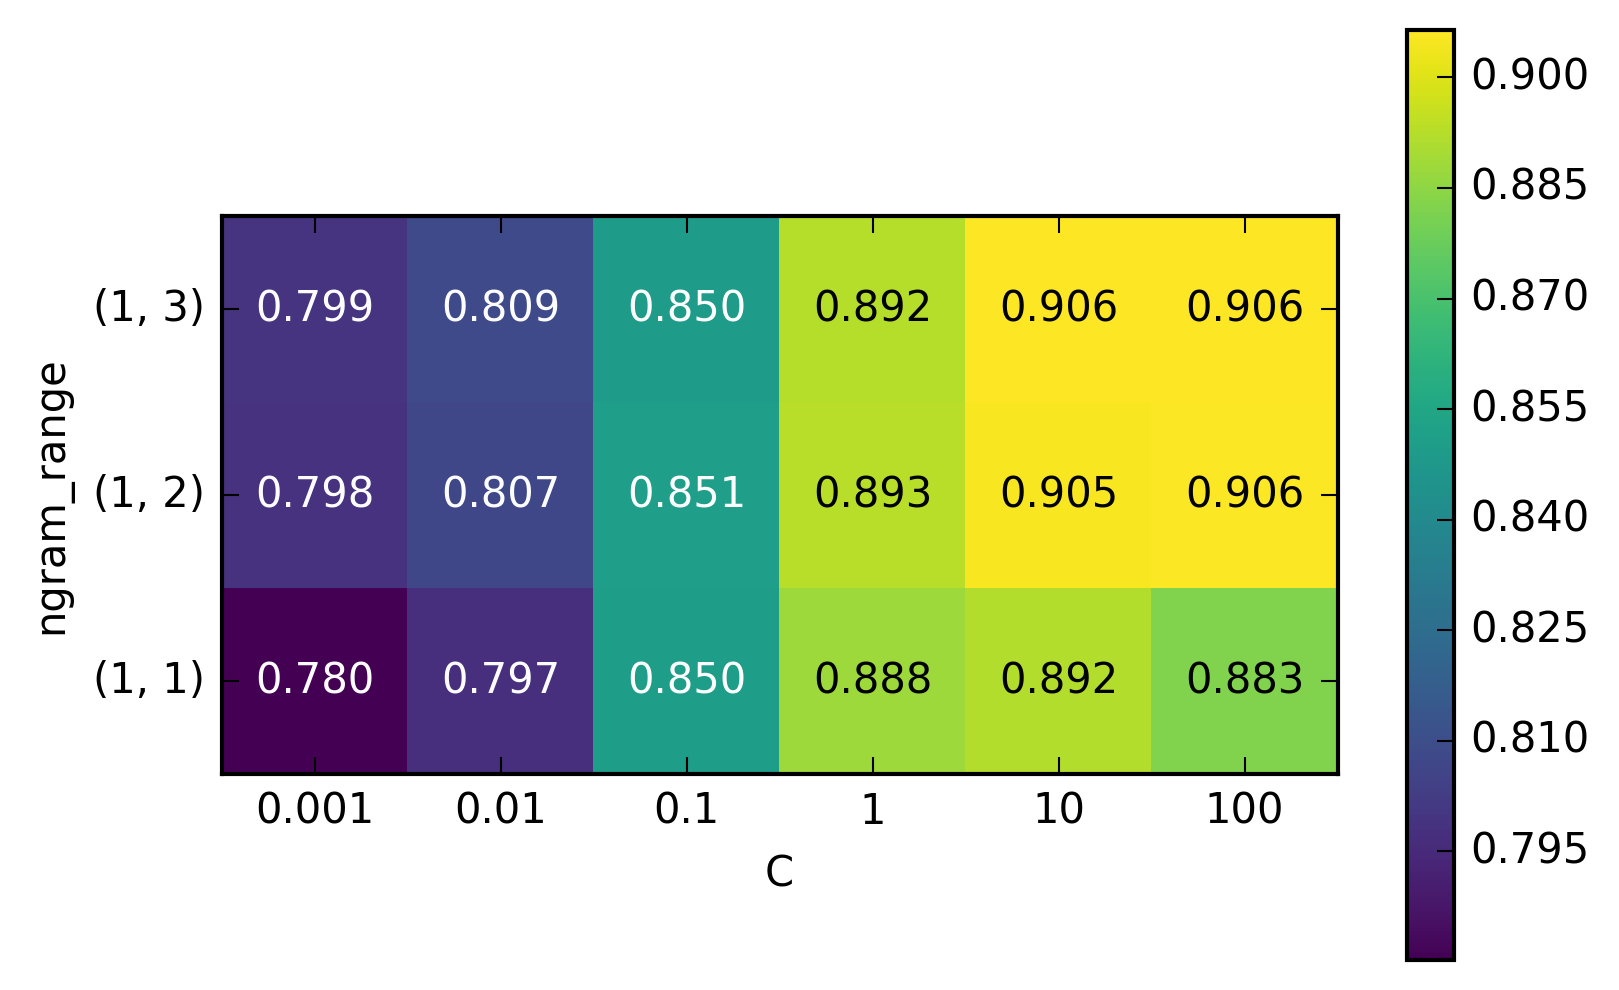

In [33]:
# extract scores from grid_search
scores = grid.results_['test_mean_score'].reshape(-1, 3).T
# visualize heatmap
heatmap = mglearn.tools.heatmap(scores, xlabel="C", ylabel="ngram_range",
                                xticklabels=param_grid['logisticregression__C'],
                                yticklabels=param_grid['tfidfvectorizer__ngram_range'],
                                cmap="viridis", fmt="%.3f")
plt.colorbar(heatmap)

(-22, 22)

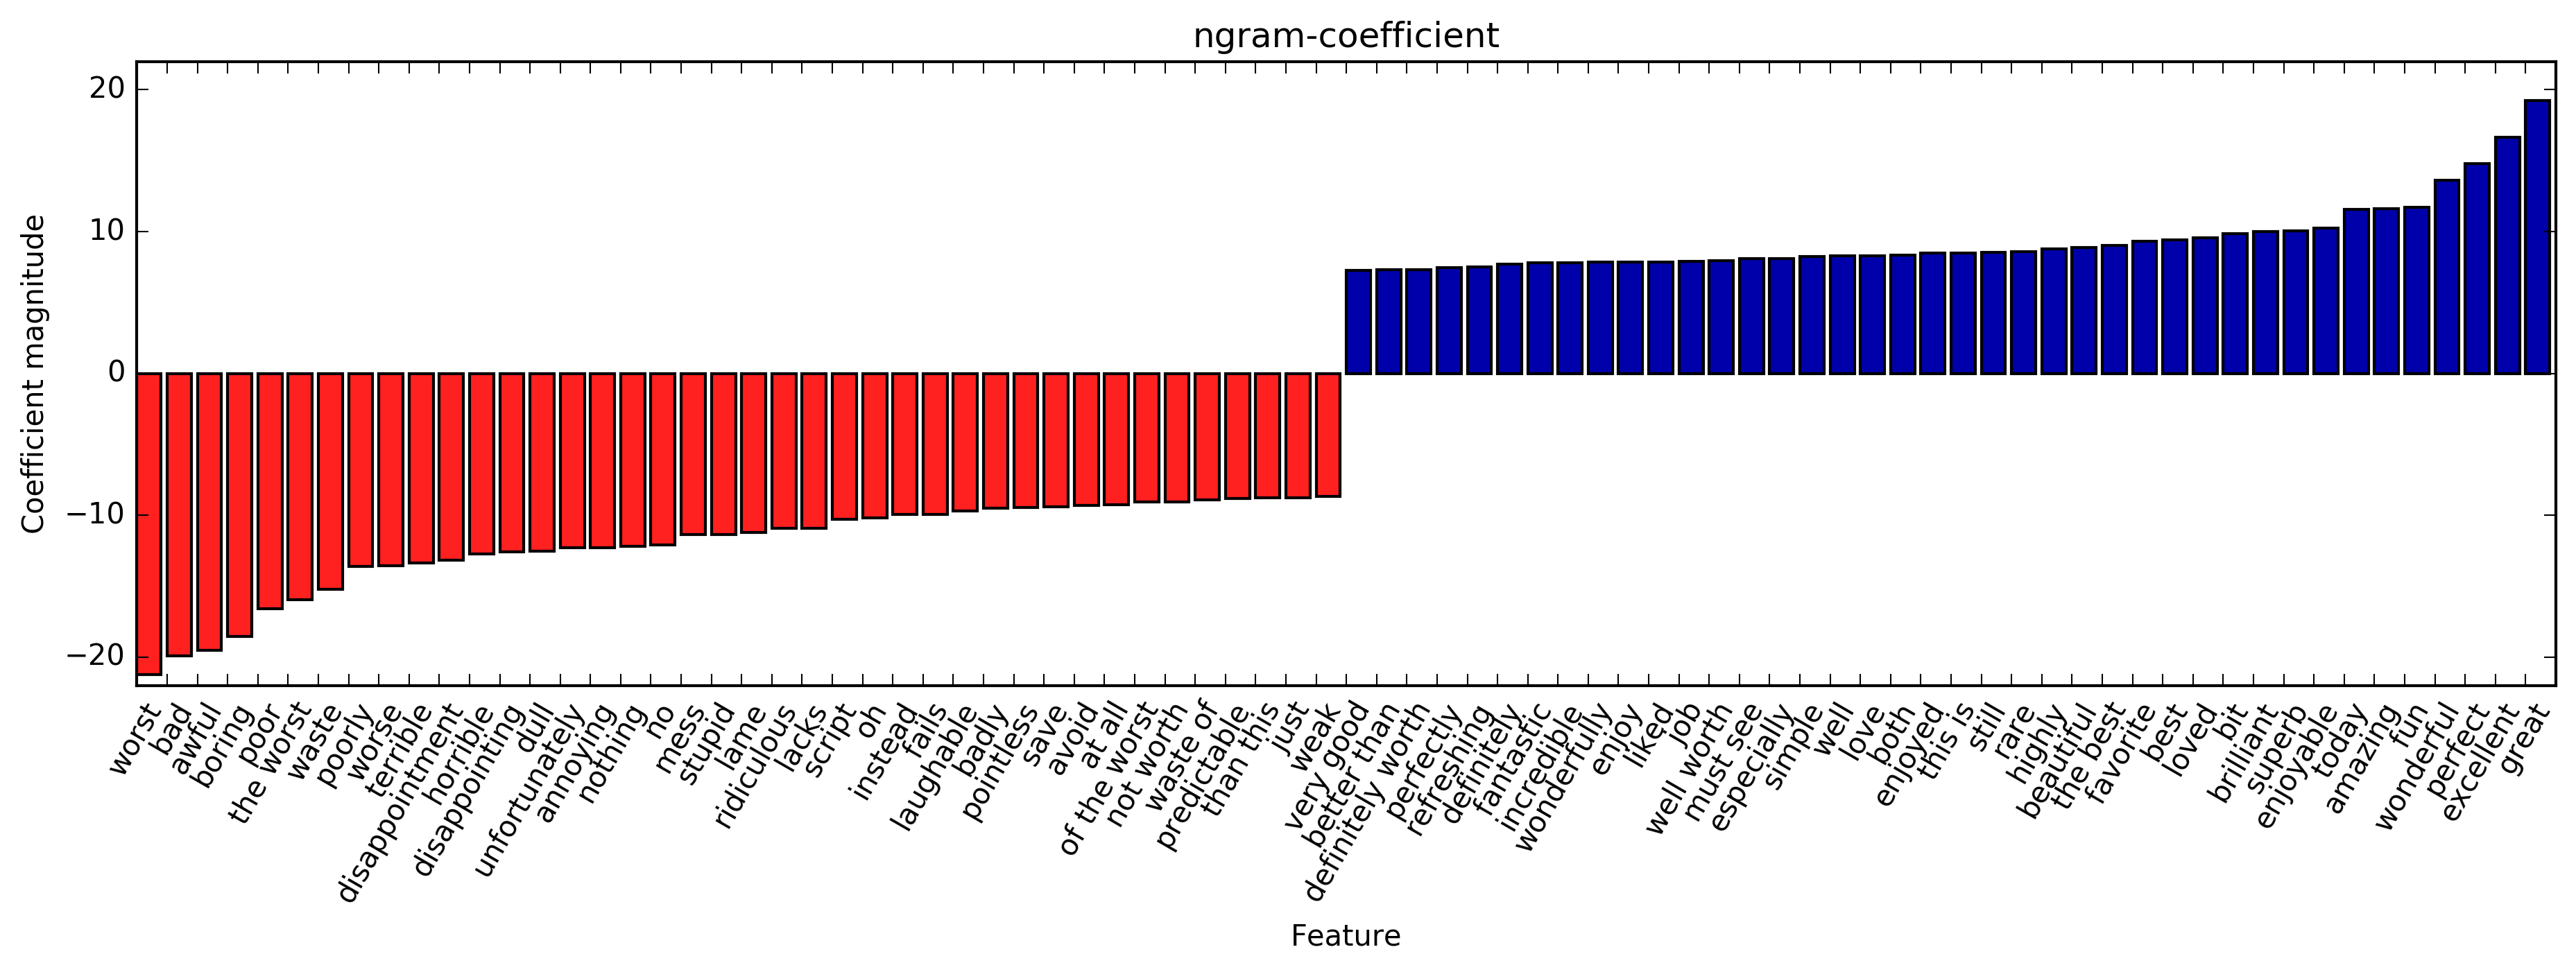

In [34]:
# extract feature names and coefficients
feature_names = np.array(grid.best_estimator_.named_steps['tfidfvectorizer'].get_feature_names())
coef = grid.best_estimator_.named_steps['logisticregression'].coef_
mglearn.tools.visualize_coefficients(coef, feature_names, n_top_features=40)
plt.title("ngram-coefficient")
plt.ylim(-22, 22)

(-22, 22)

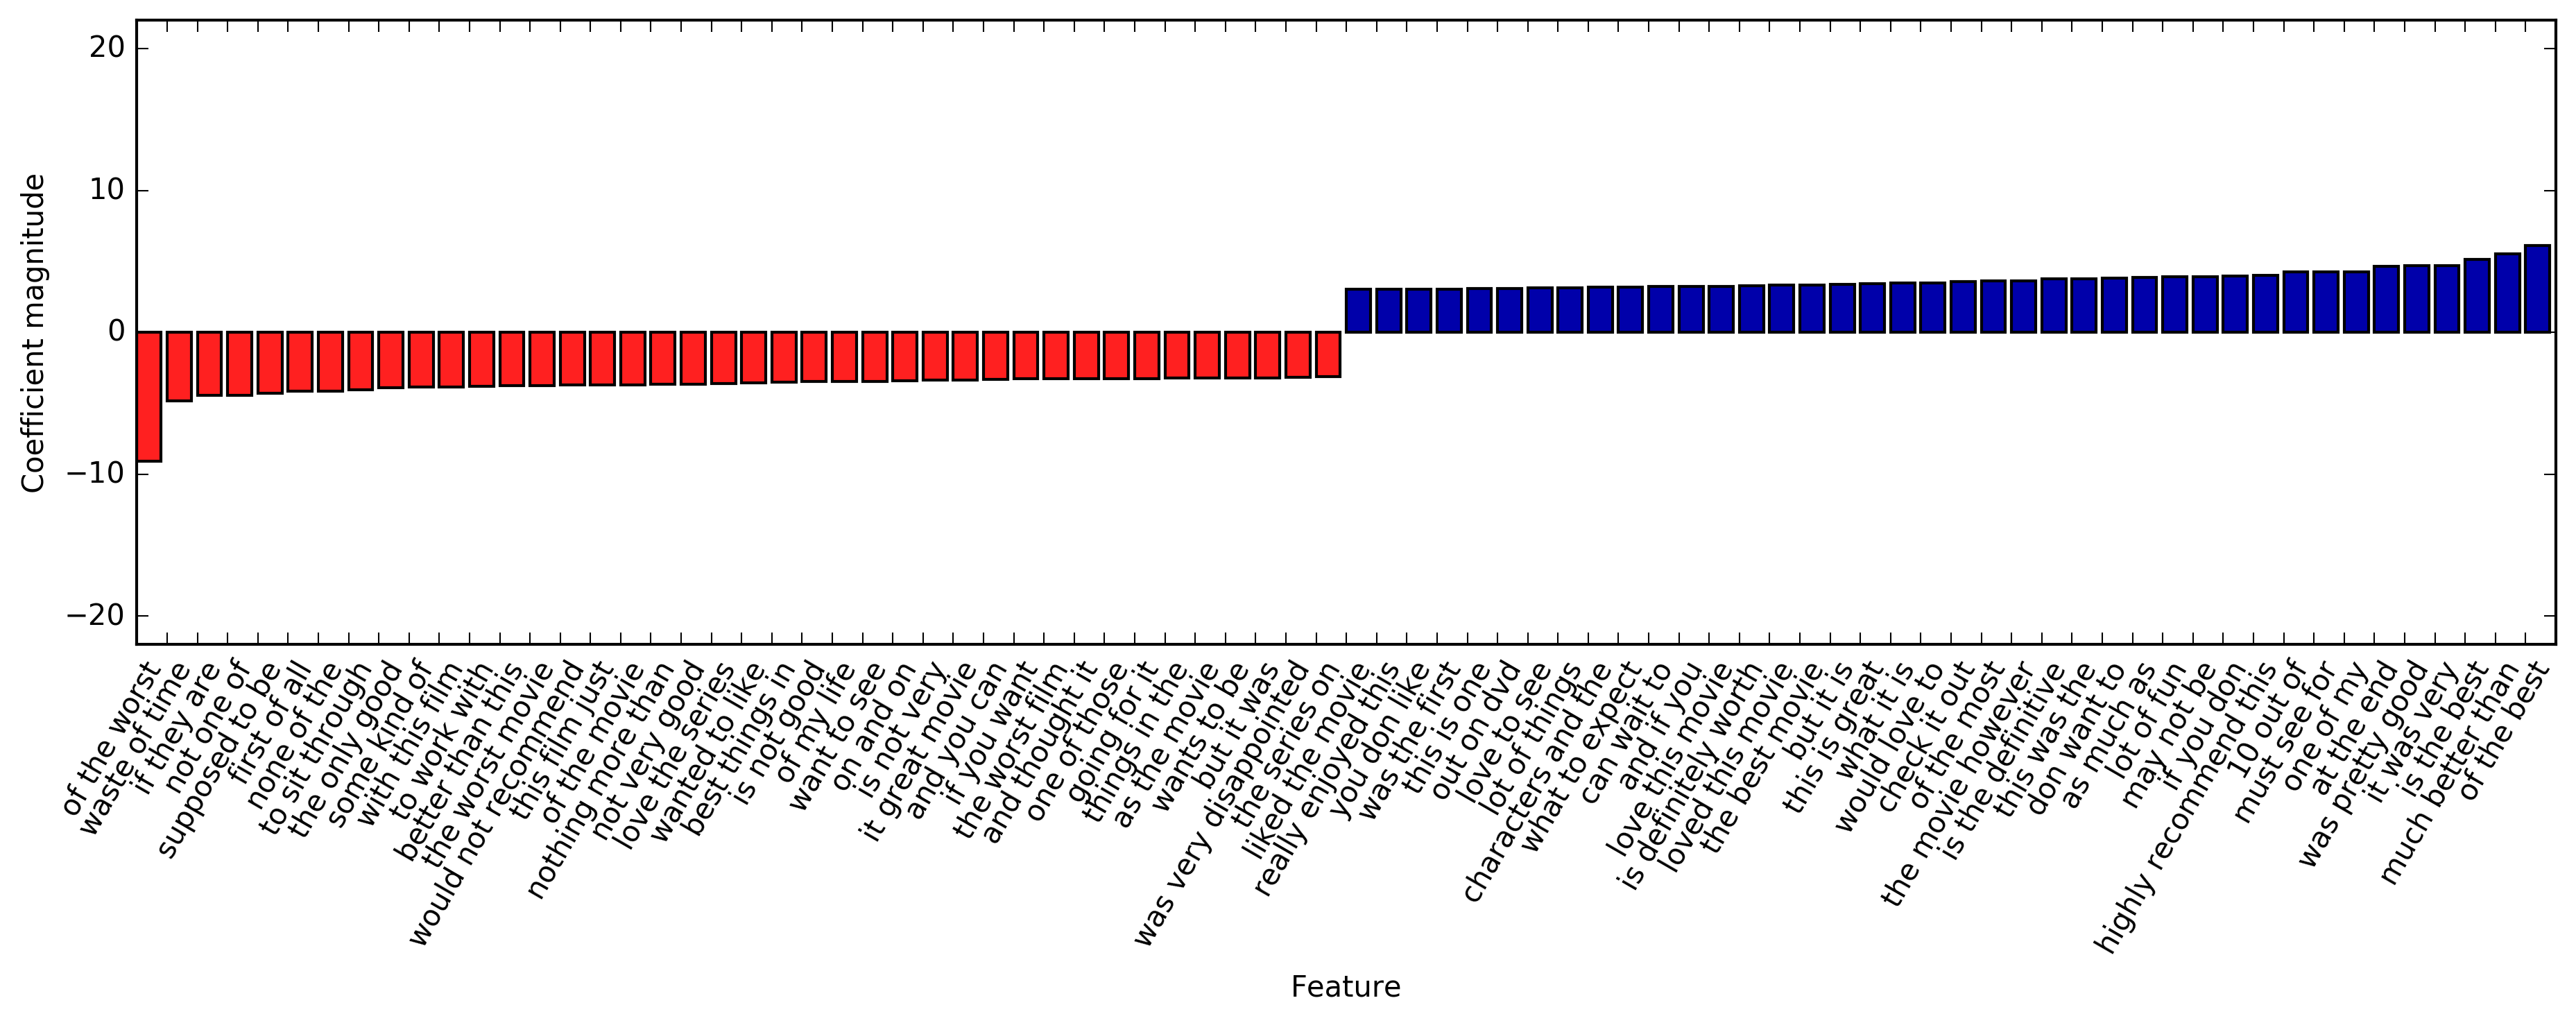

In [35]:
# find 3-gram features
mask = np.array([len(feature.split(" ")) for feature in feature_names]) == 3
# visualize only 3-gram features:
mglearn.tools.visualize_coefficients(coef.ravel()[mask],
                                     feature_names[mask], n_top_features=40)
plt.ylim(-22, 22)

### Advanced tokenization, stemming and lemmatization

In [16]:
import spacy
import nltk

# load spacy's English language models
en_nlp = spacy.load('en')
# instantiate NLTK's Porter stemmer
stemmer = nltk.stem.PorterStemmer()

# define function to compare lemmatization in spacy with stemming in NLKT
def compare_normalization(doc):
    # tokenize document in spacy:
    doc_spacy = en_nlp(doc)
    # print lemmas found by spacy
    print("Lemmatization:")
    print([token.lemma_ for token in doc_spacy])
    # print tokens found by Porter stemmer
    print("Stemming:")
    print([stemmer.stem(token.norm_.lower()) for token in doc_spacy])

In [17]:
compare_normalization(u"Our meeting today was worse than yesterday, I'm scared of meeting the clients tomorrow.")

Lemmatization:
['our', 'meeting', 'today', 'be', 'bad', 'than', 'yesterday', ',', 'i', 'be', 'scared', 'of', 'meet', 'the', 'client', 'tomorrow', '.']
Stemming:
['our', 'meet', 'today', 'wa', 'wors', 'than', 'yesterday', ',', 'i', "'m", 'scare', 'of', 'meet', 'the', 'client', 'tomorrow', '.']


In [18]:
# Technicallity: we want to use the regexp based tokenizer
# that is used by CountVectorizer  and only use the lemmatization
# from SpaCy. To this end, we replace en_nlp.tokenizer (the SpaCy tokenizer)
# with the regexp based tokenization
import re
# regexp used in CountVectorizer:
regexp = re.compile('(?u)\\b\\w\\w+\\b')

# load spacy language model and save old tokenizer
en_nlp = spacy.load('en')
old_tokenizer = en_nlp.tokenizer
# replace the tokenizer with the regexp above
en_nlp.tokenizer = lambda string: old_tokenizer.tokens_from_list(regexp.findall(string))

# create a custom tokenizer using the SpaCy document processing pipeline
# (now using our own tokenizer)
def custom_tokenizer(document):
    doc_spacy = en_nlp(document, entity=False, parse=False)
    return [token.lemma_ for token in doc_spacy]

# define a count vectorizer with the custom tokenizer
lemma_vect = CountVectorizer(tokenizer=custom_tokenizer, min_df=5)

In [19]:
# transform text_train using CountVectorizer with lemmatization
X_train_lemma = lemma_vect.fit_transform(text_train)
print("X_train_lemma.shape: ", X_train_lemma.shape)

# Standard CountVectorizer for reference
vect = CountVectorizer(min_df=5).fit(text_train)
X_train = vect.transform(text_train)
print("X_train.shape: ", X_train.shape)

X_train_lemma.shape:  (25000, 21596)
X_train.shape:  (25000, 27271)


In [20]:
# build a grid-search using only 1% of the data as training set:
from sklearn.model_selection import StratifiedShuffleSplit

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
cv = StratifiedShuffleSplit(n_iter=5, test_size=0.99,
                            train_size=0.01, random_state=0)
grid = GridSearchCV(LogisticRegression(), param_grid, cv=cv)
# Perform grid-search with standard CountVectorizer
grid.fit(X_train, y_train)
print("Best cross-validation score "
      "(standard CountVectorizer): {:.3f}".format(grid.best_score_))
# Perform grid-search with Lemmatization
grid.fit(X_train_lemma, y_train)
print("Best cross-validation score "
      "(lemmatization): {:.3f}".format(grid.best_score_))

Best cross-validation score (standard CountVectorizer): 0.721
Best cross-validation score (lemmatization): 0.731


## Topic Modeling and Document Clustering
### Latent Dirichlet Allocation

In [21]:
vect = CountVectorizer(max_features=10000, max_df=.15)
X = vect.fit_transform(text_train)

In [22]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_topics=10, learning_method="batch",
                                max_iter=25, random_state=0)
# be build the model and transform the data in one step
# computing transform takes some time, and we can save time by doing both at once.
document_topics = lda.fit_transform(X)

In [23]:
lda.components_.shape

(10, 10000)

In [24]:
# for each topic (a row in the components_), sort the features (ascending).
# Invert rows with [:, ::-1] to make sorting descending
sorting = np.argsort(lda.components_, axis=1)[:, ::-1]
# get the feature names from the vectorizer:
feature_names = np.array(vect.get_feature_names())

In [25]:
# print out the 10 topics:
mglearn.tools.print_topics(topics=range(10), feature_names=feature_names,
                           sorting=sorting, topics_per_chunk=5, n_words=10)

topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
between       war           funny         show          didn          
young         world         worst         series        saw           
family        us            comedy        episode       am            
real          our           thing         tv            thought       
performance   american      guy           episodes      years         
beautiful     documentary   re            shows         book          
work          history       stupid        season        watched       
each          new           actually      new           now           
both          own           nothing       television    dvd           
director      point         want          years         got           


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------      --------      --------      
horr

In [26]:
lda100 = LatentDirichletAllocation(n_topics=100, learning_method="batch",
                                   max_iter=25, random_state=0)
document_topics100 = lda100.fit_transform(X)

In [27]:
topics = np.array([7, 16, 24, 25, 28, 36, 37, 45, 51, 53, 54, 63, 89, 97])

In [28]:
sorting = np.argsort(lda100.components_, axis=1)[:, ::-1]
feature_names = np.array(vect.get_feature_names())
mglearn.tools.print_topics(topics=topics, feature_names=feature_names, sorting=sorting,
                           topics_per_chunk=7, n_words=20)

topic 7       topic 16      topic 24      topic 25      topic 28      topic 36      topic 37      
--------      --------      --------      --------      --------      --------      --------      
thriller      worst         german        car           beautiful     performance   excellent     
suspense      awful         hitler        gets          young         role          highly        
horror        boring        nazi          guy           old           actor         amazing       
atmosphere    horrible      midnight      around        romantic      cast          wonderful     
mystery       stupid        joe           down          between       play          truly         
house         thing         germany       kill          romance       actors        superb        
director      terrible      years         goes          wonderful     performances  actors        
quite         script        history       killed        heart         played        brilliant     
bit       

In [29]:
# sort by weight of "music" topic 45
music = np.argsort(document_topics100[:, 45])[::-1]
# print the five documents where the topic is most important
for i in music[:10]:
    # pshow first two sentences
    print(b".".join(text_train[i].split(b".")[:2]) + b".\n")

b'I love this movie and never get tired of watching. The music in it is great.\n'
b"I enjoyed Still Crazy more than any film I have seen in years. A successful band from the 70's decide to give it another try.\n"
b'Hollywood Hotel was the last movie musical that Busby Berkeley directed for Warner Bros. His directing style had changed or evolved to the point that this film does not contain his signature overhead shots or huge production numbers with thousands of extras.\n'
b"What happens to washed up rock-n-roll stars in the late 1990's? They launch a comeback / reunion tour. At least, that's what the members of Strange Fruit, a (fictional) 70's stadium rock group do.\n"
b'As a big-time Prince fan of the last three to four years, I really can\'t believe I\'ve only just got round to watching "Purple Rain". The brand new 2-disc anniversary Special Edition led me to buy it.\n'
b"This film is worth seeing alone for Jared Harris' outstanding portrayal of John Lennon. It doesn't matter that H

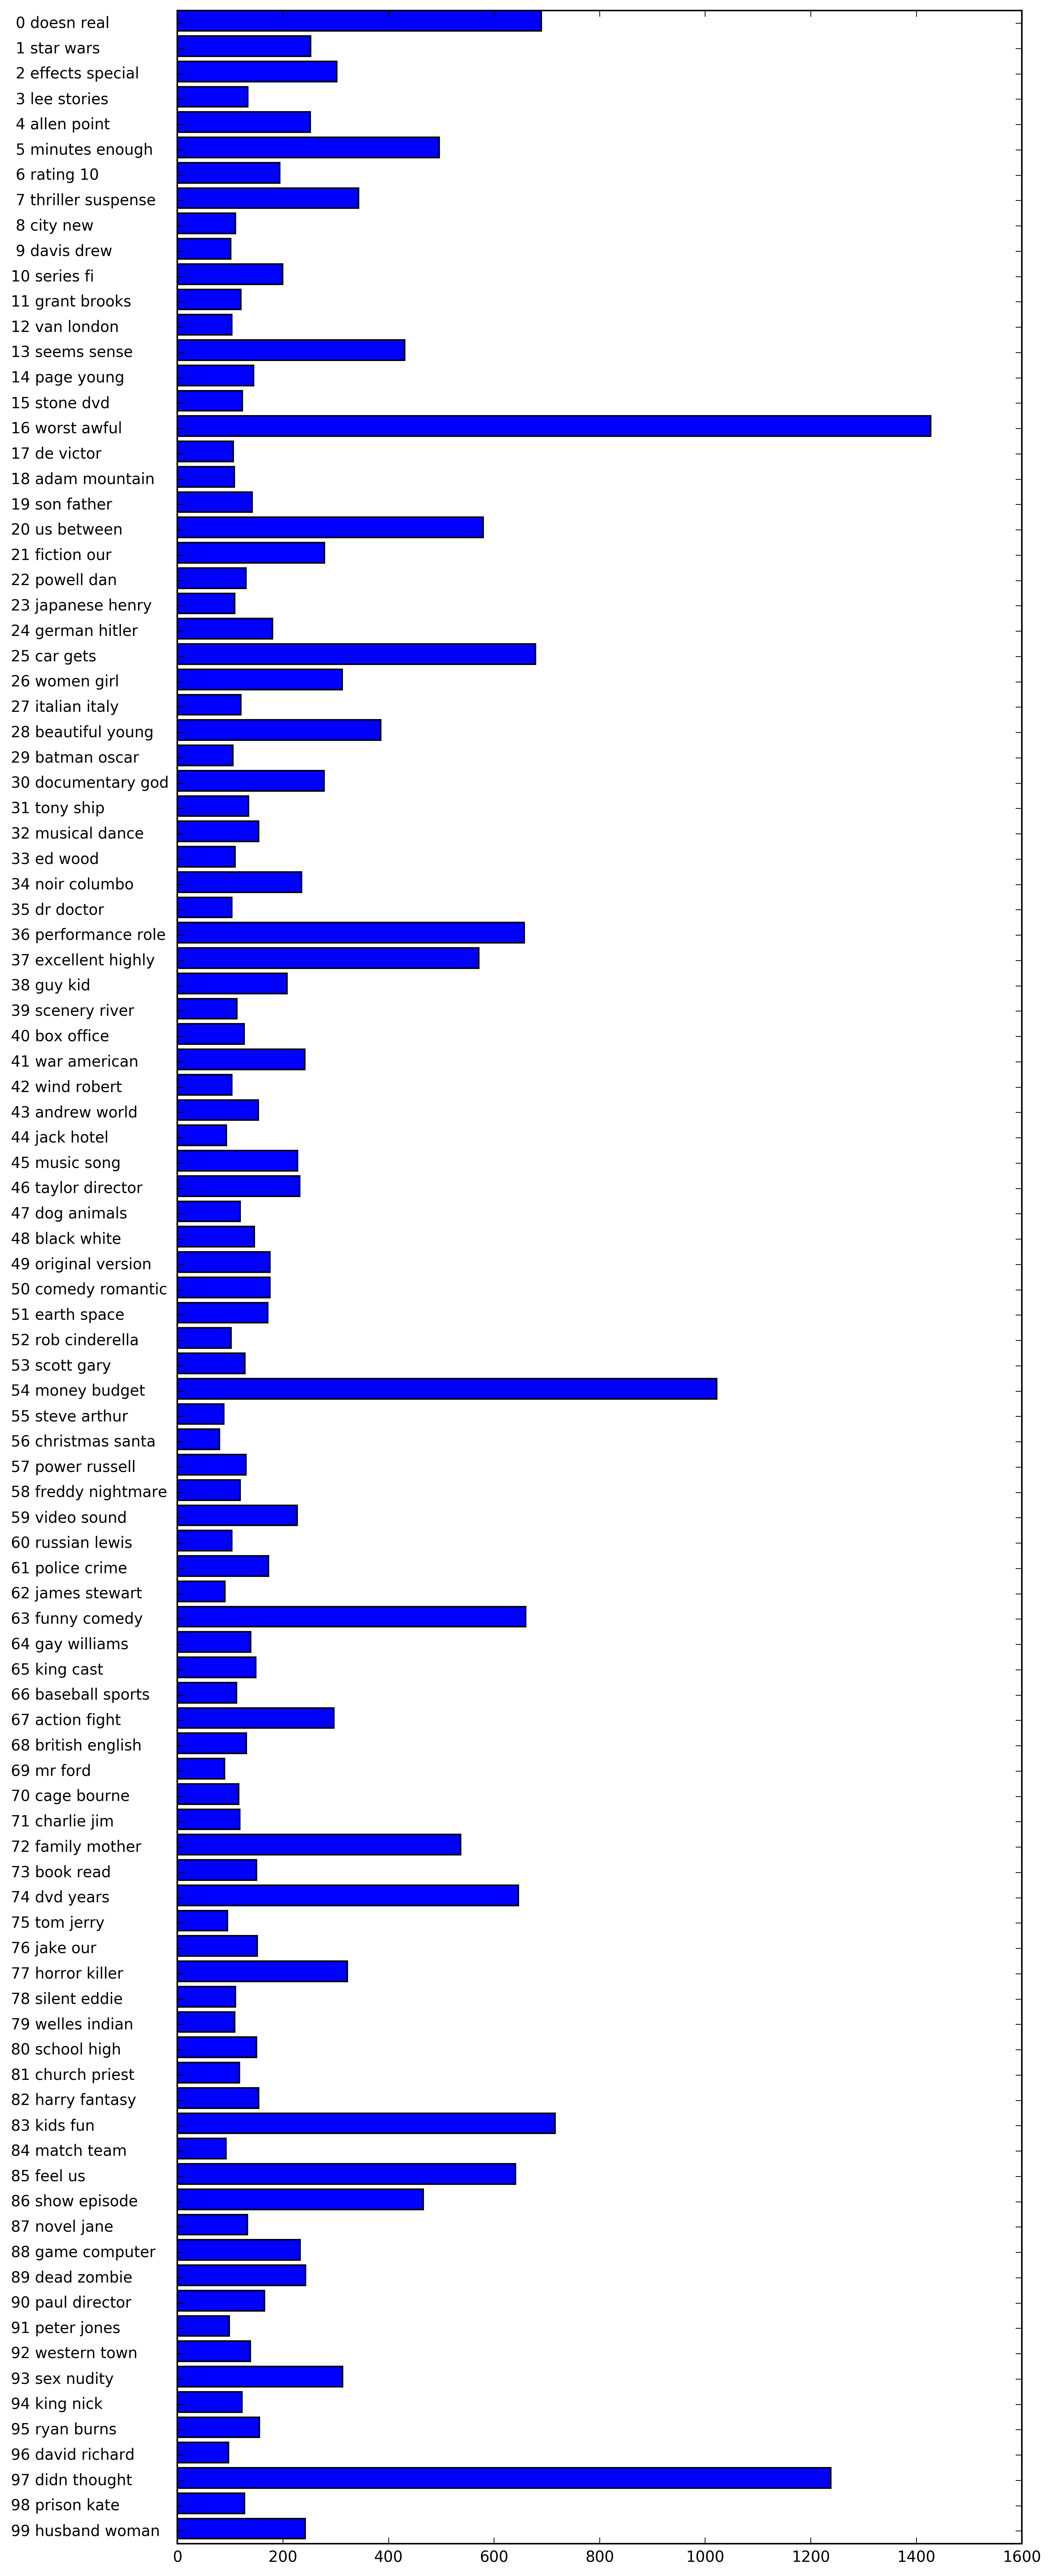

In [30]:
plt.figure(figsize=(10, 30))
plt.barh(np.arange(100), np.sum(document_topics100, axis=0))
topic_names = ["{:>2} ".format(i) + " ".join(words)
               for i, words in enumerate(feature_names[sorting[:, :2]])]
plt.yticks(np.arange(100) + .5, topic_names, ha="left")
ax = plt.gca()
ax.invert_yaxis()
yax = ax.get_yaxis()
yax.set_tick_params(pad=110)

## Summary and Outlook